In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ⚠️ Change this path to your dataset location in Drive
dataset_path = '/content/drive/MyDrive/Datasets/Traffic_Dataset'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(dataset_path, 'Train', str(i))
    images = os.listdir(path)

    for image_name in images:
        try:
            image = Image.open(os.path.join(path, image_name))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {image_name}: {e}")

data = np.array(data) / 255.0  # Normalize
labels = np.array(labels)

print("Dataset loaded:", data.shape, labels.shape)


Dataset loaded: (39323, 30, 30, 3) (39323,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,547 (6.77 MB)

 Trainable params: 1,773,547 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.utils import to_categorical

# Parameters
IMG_SIZE = 64  # Resize all images to 64x64
DATA_DIR = 'path_to_dataset_folder'  # Should contain subfolders per class
classes = os.listdir(DATA_DIR)
num_classes = len(classes)

X = []
y = []

# Load and preprocess images
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(DATA_DIR, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))        # Resize
            img = img / 255.0                                   # Normalize to [0,1]
            X.append(img)
            y.append(class_index)
        except:
            continue  # Skip unreadable images

# Convert to NumPy arrays
X = np.array(X)
y = to_categorical(y, num_classes=num_classes)  # One-hot encode labels

print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint_path = os.path.join(dataset_path, 'best_model.h5')
model_ckpt = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)


In [ ]:
epochs = 30

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    steps_per_epoch=X_train.shape[0] // 64,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, model_ckpt])


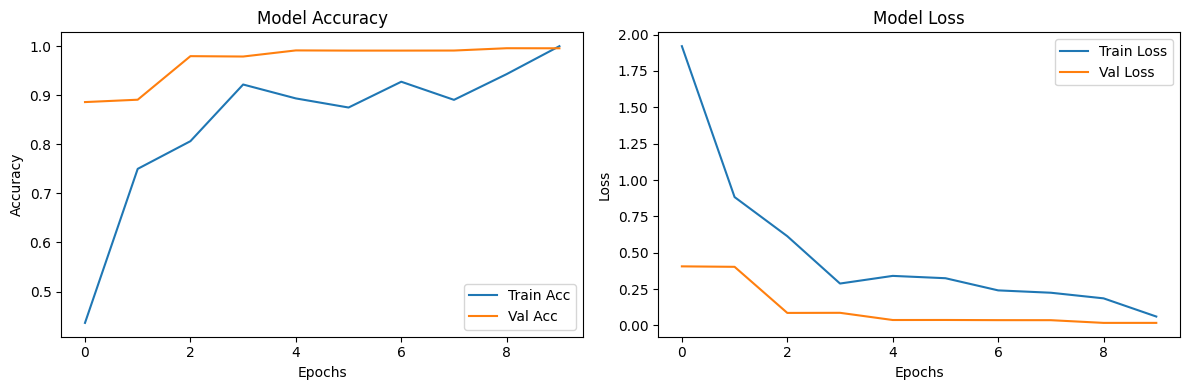

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
from glob import glob

# Check inside your dataset folder for any .h5 model file
model_files = glob(os.path.join(dataset_path, "*.h5"))
print("Found model files:")
print(model_files)


Found model files:
['/content/drive/MyDrive/Datasets/Traffic_Dataset/best_model.h5']


In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import pandas as pd

# Load the best saved model
model = load_model(os.path.join(dataset_path, "best_model.h5"))

# Test directory path
test_dir = os.path.join(dataset_path, 'Test')
test_images = sorted(os.listdir(test_dir))

X_test = []
file_names = []

for fname in test_images:
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(test_dir, fname)
        try:
            img = Image.open(path).convert("RGB").resize((30, 30))
            img_array = np.array(img) / 255.0  # normalize
            if img_array.shape == (30, 30, 3):
                X_test.append(img_array)
                file_names.append(fname)
        except Exception as e:
            print(f"Error with {fname}: {e}")

X_test = np.array(X_test)

# Predict
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# Save predictions
results_df = pd.DataFrame({
    "Filename": file_names,
    "PredictedClass": pred_classes
})

results_df.to_csv(os.path.join(dataset_path, "test_detections.csv"), index=False)
print("✅ Detections saved to test_predictions.csv")


397/397 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step
✅ Detections saved to test_predictions.csv


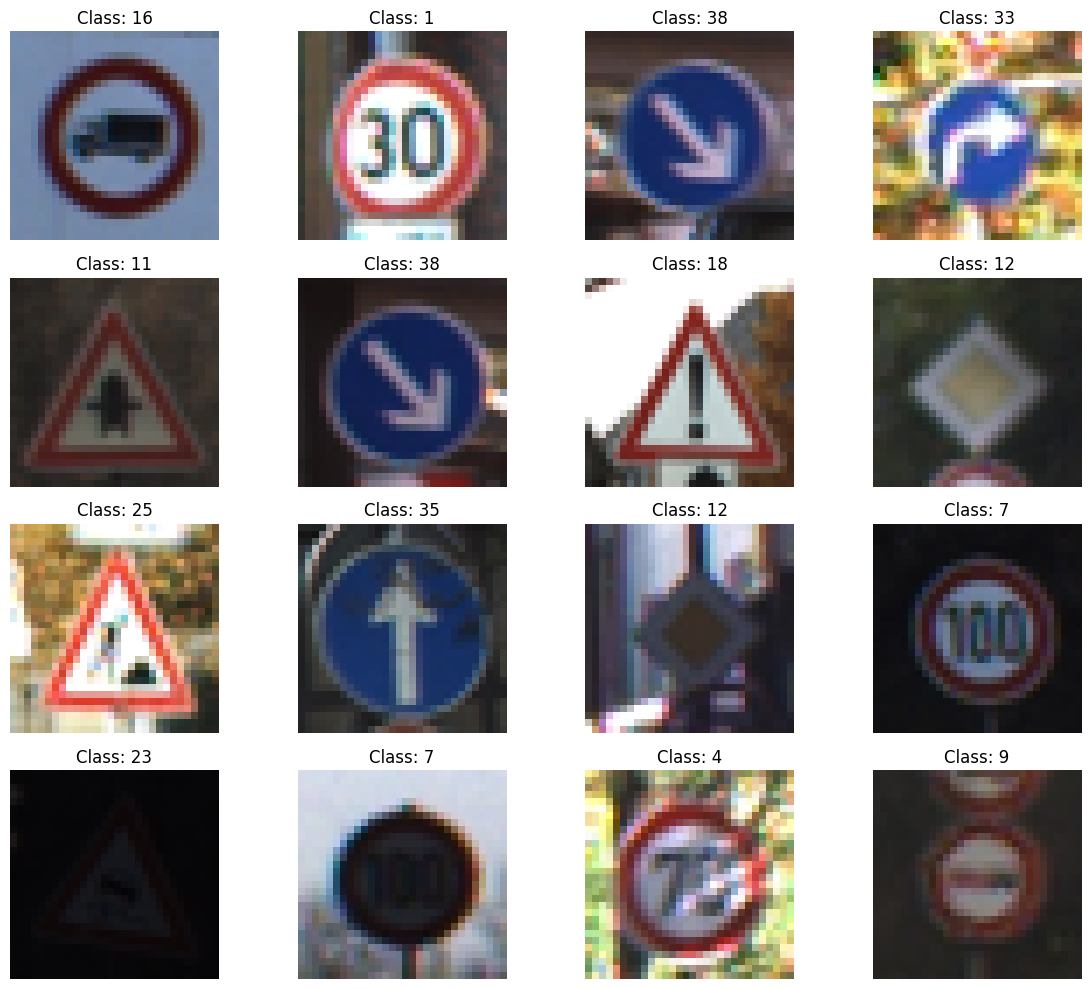

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
for i in range(min(16, len(X_test))):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Class: {pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"✅ Final Validation Accuracy: {final_val_acc * 100:.2f}%")


✅ Final Validation Accuracy: 99.57%


In [ ]:
from tensorflow.keras.models import load_model

model_path = os.path.join(dataset_path, 'best_model.h5')
model = load_model(model_path)


In [ ]:
# Example: If your 43 classes are known
classes = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
    'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
    'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons',
    'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
    'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
    'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
    'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
    'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead',
    'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right',
    'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'
]


Saving 00009.png to 00009.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
🧠 Detected Class ID: 35
🔤 Traffic Sign: Ahead only


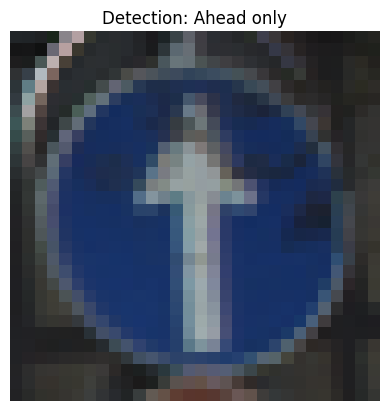

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fname in uploaded.keys():
    img = Image.open(fname).convert('RGB').resize((30, 30))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob)

    print(f"🧠 Detected Class ID: {pred_class}")
    print(f"🔤 Traffic Sign: {classes[pred_class]}")

    # Show image
    plt.imshow(img)
    plt.title(f"Detection: {classes[pred_class]}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fname in uploaded.keys():
    img = Image.open(fname).convert('RGB').resize((30, 30))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob)

    print(f"🧠 Detected Class ID: {pred_class}")
    print(f"🔤 Traffic Sign: {classes[pred_class]}")

    # Show image
    plt.imshow(img)
    plt.title(f"Detection: {classes[pred_class]}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fname in uploaded.keys():
    img = Image.open(fname).convert('RGB').resize((30, 30))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob)

    print(f"🧠 Detected Class ID: {pred_class}")
    print(f"🔤 Traffic Sign: {classes[pred_class]}")

    # Show image
    plt.imshow(img)
    plt.title(f"Detection: {classes[pred_class]}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()

for fname in uploaded.keys():
    img = Image.open(fname).convert('RGB').resize((30, 30))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob)

    print(f"🧠 Detected Class ID: {pred_class}")
    print(f"🔤 Traffic Sign: {classes[pred_class]}")

    # Show image
    plt.imshow(img)
    plt.title(f"Detection: {classes[pred_class]}")
    plt.axis('off')
    plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step


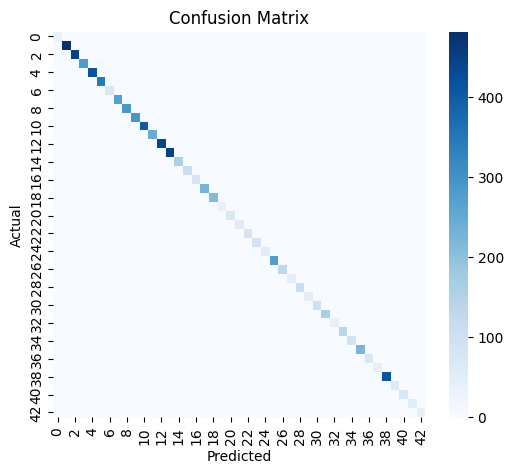

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation data
y_val_true = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)

cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(6, 5))  # reduced size here
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os

src_dataset = '/content/drive/MyDrive/Datasets/Traffic_Dataset/Train'
dst_dataset = '/content/drive/MyDrive/Datasets/Traffic_Dataset'

# create folders
for split in ['train', 'val']:
    os.makedirs(f'{dst_dataset}/images/{split}', exist_ok=True)
    os.makedirs(f'{dst_dataset}/labels/{split}', exist_ok=True)

from sklearn.model_selection import train_test_split

images = []
labels = []
classes = 43

for i in range(classes):
    class_folder = os.path.join(src_dataset, str(i))
    imgs = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.endswith(('.jpg', '.png'))]
    images += imgs
    labels += [i] * len(imgs)

train_imgs, val_imgs, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

def save_yolo(img_paths, lbls, split):
    for img_path, cls in zip(img_paths, lbls):
        fname = os.path.basename(img_path).split('.')[0]
        dst_img = f"{dst_dataset}/images/{split}/{fname}.jpg"
        dst_lbl = f"{dst_dataset}/labels/{split}/{fname}.txt"

        # copy image
        os.system(f'cp "{img_path}" "{dst_img}"')

        # write dummy bbox covering entire image (normalized)
        with open(dst_lbl, 'w') as f:
            f.write(f"{cls} 0.5 0.5 1.0 1.0\n")

save_yolo(train_imgs, train_labels, 'train')
save_yolo(val_imgs, val_labels, 'val')


In [ ]:
train: /content/drive/MyDrive/Datasets/Traffic_Dataset/images/train
val: /content/drive/MyDrive/Datasets/Traffic_Dataset/images/val

nc: 43
names:
  - Speed limit (20km/h)
  - Speed limit (30km/h)
  - Speed limit (50km/h)
  - Speed limit (60km/h)
  - Speed limit (70km/h)
  - Speed limit (80km/h)
  - End of speed limit (80km/h)
  - Speed limit (100km/h)
  - Speed limit (120km/h)
  - No passing
  - No passing for vehicles over 3.5 metric tons
  - Right-of-way at the next intersection
  - Priority road
  - Yield
  - Stop
  - No vehicles
  - Vehicles over 3.5 metric tons prohibited
  - No entry
  - General caution
  - Dangerous curve to the left
  - Dangerous curve to the right
  - Double curve
  - Bumpy road
  - Slippery road
  - Road narrows on the right
  - Road work
  - Traffic signals
  - Pedestrians
  - Children crossing
  - Bicycles crossing
  - Beware of ice/snow
  - Wild animals crossing
  - End of all speed and passing limits
  - Turn right ahead
  - Turn left ahead
  - Ahead only
  - Go straight or right
  - Go straight or left
  - Keep right
  - Keep left
  - Roundabout mandatory
  - End of no passing
  - End of no passing by vehicles over 3.5 metric tons


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 752.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # or yolov8s.yaml, yolov8m.yaml, etc.

model.train(
    data='/content/drive/MyDrive/Datasets/Traffic_Dataset/traffic.yaml',
    epochs=20,
    imgsz=640,
    batch=16
)


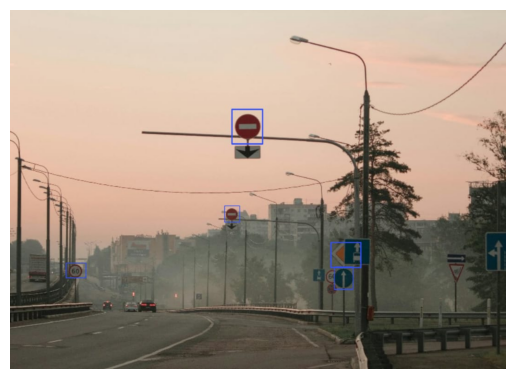

🔍 Detected: No entry
🔍 Detected: Priority road
🔍 Detected: Ahead only


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Upload an image
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Run detection
results = model(img_path)  # returns list of results

# Display detected image
results[0].save(filename='detected.jpg')
img = Image.open('detected.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# Print detected classes
names = model.names
for r in results:
    for box in r.boxes:
        cls = int(box.cls)
        conf = float(box.conf)
        print(f"🔍 Detected: {classes[pred_class]}")


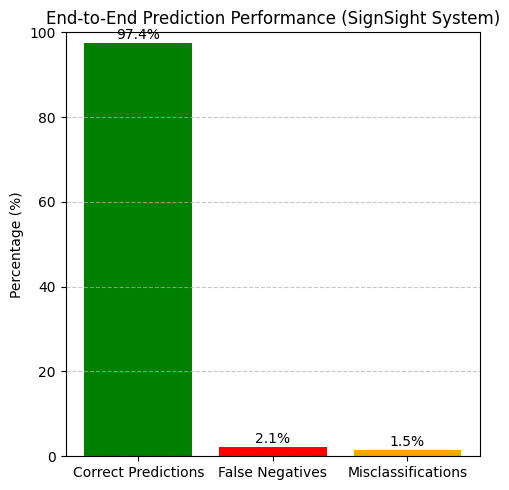

In [1]:
import matplotlib.pyplot as plt

# Define performance categories
categories = ['Correct Predictions', 'False Negatives', 'Misclassifications']

# Color scheme for bars
colors = ['green', 'red', 'orange']

# Create the bar chart
plt.figure(figsize=(5, 5))
bars = plt.bar(categories, values, color=colors)

# Add percentage labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f'{yval}%', ha='center', va='bottom')

# Chart formatting
plt.title('End-to-End Prediction Performance (SignSight System)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
